# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Trương Thuận Kiệt
- MSSV: 22127224
- Lớp: 22CLC01

## Import các thư viện liên quan

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np
import os

## Helper functions

In [2]:

def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''
    img = Image.open(img_path)
    # Convert image to numpy array
    img_2d = np.array(img) 
    return img_2d

def show_img(img_2d):
    '''
    Show image
    
    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''
    plt.imshow(img_2d)
    plt.show()

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''
    # print("Hình ảnh trước khi lưu: ", img_2d)
    img = Image.fromarray(img_2d)
    # print("Hình ảnh sau khi lưu: ", img)
    img.save(img_path)

def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    height, width, channels = img_2d.shape
    # Reshape 2D image to 1D image
    img_1d = img_2d.reshape((height * width, channels))
    return img_1d


def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    height_width, num_channels = img_1d.shape
    # print(img_1d.shape)
    # Initialize centroids
    if init_centroids == 'random':
        centroids = np.random.randint(0, 255, size=(k_clusters, num_channels))
    elif init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(range(img_1d.shape[0]), k_clusters, replace=False)]
    # print("Centroids: ", centroids)
    # Initialize labels
    labels = np.zeros(height_width, dtype=int)
    
    for _ in range(max_iter):
        # Calculate distances between each pixel and centroids (Euclidean distance), in this case using axis=2 because we have 3 channels
        distances = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2) 
        # Assign labels to each pixel
        new_labels = np.argmin(distances, axis=0)

        # Initialize new centroids for each cluster
        new_centroids = [np.zeros(num_channels) for _ in range(k_clusters)]
        for i in range(k_clusters):
            if np.sum(new_labels == i) > 0:
                # Calculate the mean of all pixels in the cluster
                new_centroids[i] = img_1d[new_labels == i].mean(axis=0)
        # Convert list to numpy array
        new_centroids = np.array(new_centroids)
        
        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        # Update centroids and labels
        centroids = new_centroids
        labels = new_labels

    return centroids, labels

def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''
    # Convert labels to 1D image
    new_img_1d = centroids[labels].astype(np.uint8)
    # print("new_img_1d: ", new_img_1d)
    # Reshape 1D image to 2D image
    new_img_2d = new_img_1d.reshape(img_2d_shape)
    # print("new_img_2d: ", new_img_2d)
    return new_img_2d

def check_valid_path(path):
    '''
    Check if file is .png, .jpg, .jpeg

    Parameters
    ----------
    path : str
        Path to check

    Returns
    -------
        True if the path is valid, False otherwise
    '''
    if path.endswith('.png') or path.endswith('.jpg') or path.endswith('.jpeg'):
        return True
    else :
        raise ValueError("File is not .png, .jpg, .jpeg")

## Your tests

In [3]:
# YOUR CODE HERE
test1 = 'test1.jpg'
test2 = 'test2.jpg'
test3 = 'test3.jpg'
test4 = 'test4.jpeg'
test5 = 'test5.jpg'
test6 = 'test6.jpg'


## Main FUNCTION

In [4]:
# YOUR CODE HERE
def main():
    
    img_path = input("Enter the image path: ")
    
    # Check if the path is valid
    check_valid_path(img_path)
    
    # Read image
    img_2d = read_img(img_path)
    
    # Show image
    show_img(img_2d)
    # Get img_path name for example C:\Users\ACER\Downloads\Math_for_IT\22127224_Lab02\test1.jpg -> test1
    file_name = os.path.basename(img_path).split('.')[0]
    
    # K-means clustering and input max_iter
    k_clusters = [3,5,7]
    max_iter = int(input("Enter the maximum number of iterations: "))
    
    # # Convert 2D image to 1D image
    img_1d = convert_img_to_1d(img_2d)
    
    # print("img_1d: \n", img_1d)
    for i in range (len(k_clusters)):
        print("Using self-made KMeans algorithm")
        save_path = os.path.dirname(img_path)
        
        # Initialize method for centroids
        init_centroids = input("Enter the method to initialize the centroids for K-means clustering: (random/in_pixels) press 0 for random, 1 for in_pixels")
        if init_centroids == '0':
            init_centroids = 'random'
        elif init_centroids == '1':
            init_centroids = 'in_pixels'
            
        # K-means clustering
        centroids, labels = kmeans(img_1d, k_clusters[i], max_iter, init_centroids)
        print("centroids: \n", centroids)
        print("labels: \n", labels)

        # Generate 2D image
        img_2d_new = generate_2d_img(img_2d.shape, centroids, labels)
        print("k_clusters: ", k_clusters[i])
        show_img(img_2d_new)
        save_format = input("Enter the format to save the image: (only .png, .jpg, .jpeg .pdf)")
        save_path = os.path.join(save_path, f"{file_name}_output_{init_centroids}_{k_clusters[i]}_clusters.{save_format}")  # Combine directory path and file name
        
    # Save image
        save_img(img_2d_new, f"{save_path}")

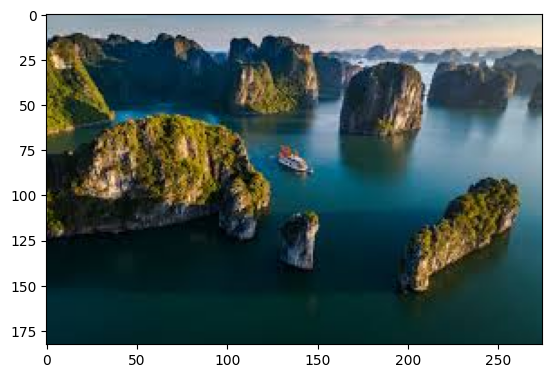

Using self-made KMeans algorithm
centroids: 
 [[ 13.64484993  41.74570276  44.74520693]
 [163.28261339 173.05205184 176.90291577]
 [ 91.31674836  98.92795709  78.00804587]]
labels: 
 [1 1 1 ... 0 0 0]
k_clusters:  3


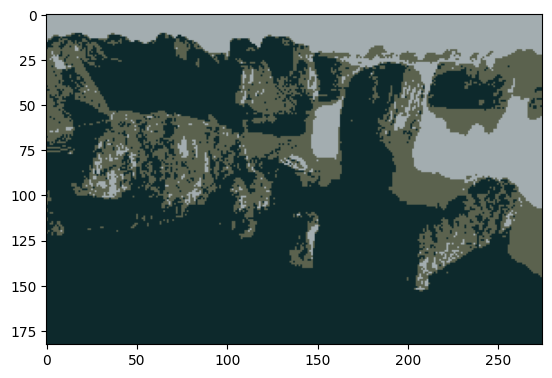

Using self-made KMeans algorithm
centroids: 
 [[125.77264986 149.59366485 162.23739782]
 [ 37.79958633  77.53831918  88.92978445]
 [194.21052632 191.91745389 188.45681511]
 [ 11.24161421  36.40498765  37.89407219]
 [119.0379437  100.94019934  48.36352509]]
labels: 
 [0 0 0 ... 3 3 3]
k_clusters:  5


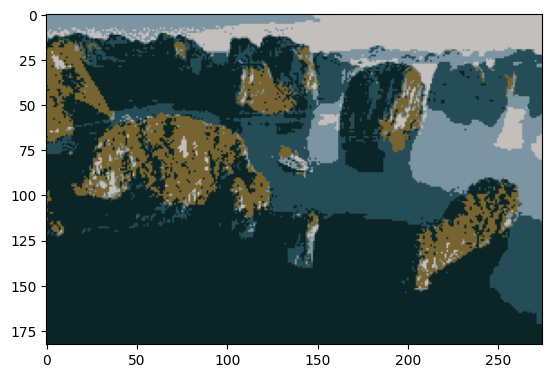

Using self-made KMeans algorithm
centroids: 
 [[ 80.23154815  70.28532853  32.41494149]
 [ 59.39767779 102.07837446 118.32776971]
 [  7.41074846  32.68429536  34.47018233]
 [203.94614698 197.40285629 191.0526629 ]
 [ 22.14368973  60.36907916  71.42598283]
 [143.4527972  121.67773893  65.43793706]
 [137.0641003  159.10912944 172.50679852]]
labels: 
 [6 6 6 ... 4 4 4]
k_clusters:  7


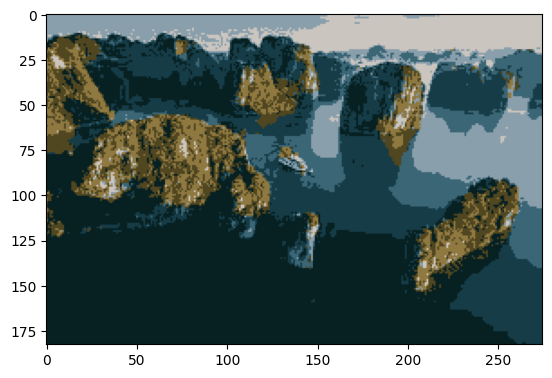

In [5]:
# Call main function
main()